<a href="https://colab.research.google.com/github/matias-gonz/GorkhaExploracionDatos/blob/master/gorkha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TP1 Exploración de Datos**

Enunciado: https://docs.google.com/document/d/1JsYpmZP-GRGVtKZX_aN4FdvLEFzImutK26gLbtJ6c8g/edit

Graficos: https://www.python-graph-gallery.com/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')



In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
id='1Xcx51Afb_Mzw56BCaF0wVu8eGFZWJhcZ'
id2='1F45NhouvIGHdsXLwZ2wU9rZAc16XL8Ls'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_values.csv')
downloaded2 = drive.CreateFile({'id': id2})
downloaded2.GetContentFile('train_labels.csv')

In [5]:
earthquake_df = pd.read_csv('train_values.csv', encoding='latin1',sep=',')
earthquake_df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [6]:
earthquake_labels = pd.read_csv('train_labels.csv', encoding='latin1',sep=',')
earthquake_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [7]:
earthquake_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [8]:
earthquake_labels['building_id'] = pd.to_numeric(earthquake_labels['building_id'],downcast='integer')
earthquake_labels['damage_grade'] = pd.to_numeric(earthquake_labels['damage_grade'],downcast='integer')
earthquake_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int32
 1   damage_grade  260601 non-null  int8 
dtypes: int32(1), int8(1)
memory usage: 1.2 MB


In [9]:
earthquake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [10]:
earthquake_df.value_counts(subset=['age'])

age
10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
130        9
140        9
180        7
160        6
170        6
135        5
175        5
145        3
190        3
165        2
195        2
155        1
185        1
dtype: int64

Se separan los datos de edificios 'historicos' y edificios modernos.

In [11]:
earthquake_df_historicos = earthquake_df.loc[earthquake_df['age'] > 300]
earthquake_df = earthquake_df.loc[earthquake_df['age'] <= 300]

Convencion colores damage grade

In [12]:
colores = ['gold','coral','firebrick']

**Conteos**


**Cantidad de Familias afectadas**

In [13]:
earthquake_df['count_families'].sum()

255105

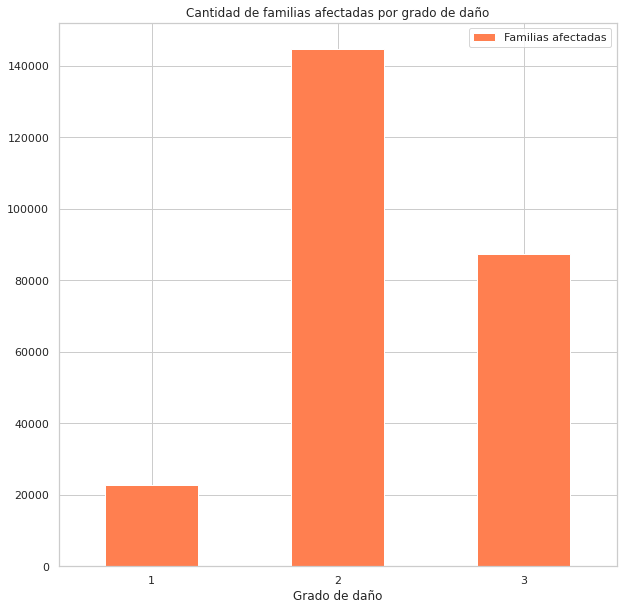

In [14]:
cantidad_familias_por_danio = earthquake_df[["building_id","count_families"]].merge(earthquake_labels,how="inner").groupby("damage_grade").agg({"count_families":"sum"})
cantidad_familias_por_danio.columns = ['Familias afectadas']
familias_graph = cantidad_familias_por_danio.plot(kind='bar',rot=0, color = 'coral')
familias_graph.set_xlabel("Grado de daño")
familias_graph.set_title('Cantidad de familias afectadas por grado de daño')
familias_graph.figure.set_size_inches(10,10)

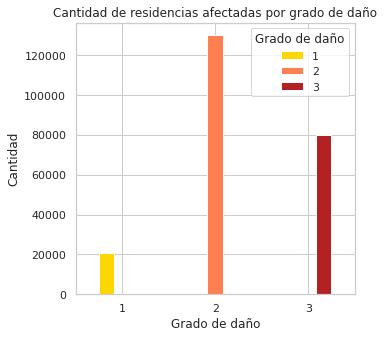

In [15]:
residencias = earthquake_df.loc[earthquake_df['has_secondary_use'] == 0]
residencias_por_danio = residencias[["building_id"]].merge(earthquake_labels,how="inner").pivot_table(index='damage_grade',columns='damage_grade',values='building_id',aggfunc='count')
residencias_por_danio.T.index.name = 'Grado de daño'
residencias_graph = residencias_por_danio.plot(kind='bar',rot=0, color = colores)
residencias_graph.set_xlabel("Grado de daño")
residencias_graph.set_ylabel("Cantidad")
residencias_graph.set_title('Cantidad de residencias afectadas por grado de daño')
residencias_graph.figure.set_size_inches(5,5)

**Escuelas y centros de Salud afectados**

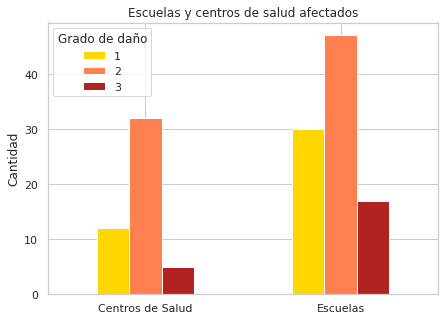

In [16]:
tipos_de_uso_secundario = earthquake_df.loc[earthquake_df["has_secondary_use"]==1]
escuelas_salud = tipos_de_uso_secundario.loc[(tipos_de_uso_secundario["has_secondary_use_school"]==1) | (tipos_de_uso_secundario["has_secondary_use_health_post"]==1)]
escuelas_salud_por_danio = escuelas_salud[["building_id","has_secondary_use_school"]].merge(earthquake_labels,how="inner")
escuelas_salud_por_danio= escuelas_salud_por_danio.pivot_table(index='has_secondary_use_school',columns='damage_grade',values='building_id',aggfunc='count')
escuelas_salud_por_danio.index = ["Centros de Salud","Escuelas"]
escuelas_salud_por_danio.T.index.name = 'Grado de daño'
escuelas_salud_graph = escuelas_salud_por_danio.plot(kind='bar',rot=0, color = ['gold','coral','firebrick'])
escuelas_salud_graph.set_xlabel(None)
escuelas_salud_graph.set_ylabel("Cantidad")
escuelas_salud_graph.set_title('Escuelas y centros de salud afectados')
escuelas_salud_graph.figure.set_size_inches(7,5)

**Edificios historicos**

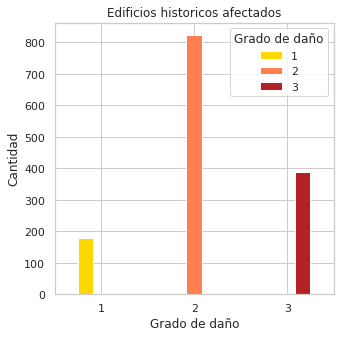

In [17]:
edificios_historicos = earthquake_df_historicos[["building_id"]].merge(earthquake_labels,how="inner").pivot_table(index='damage_grade',columns='damage_grade',values='building_id',aggfunc='count')
edificios_historicos.T.index.name = 'Grado de daño'
edificios_historicos_graph = edificios_historicos.plot(kind='bar',rot=0, color = ['gold','coral','firebrick'])
edificios_historicos_graph.set_xlabel("Grado de daño")
edificios_historicos_graph.set_ylabel("Cantidad")
edificios_historicos_graph.set_title('Edificios historicos afectados')
edificios_historicos_graph.figure.set_size_inches(5,5)

**Construcciones con usos secundarios**

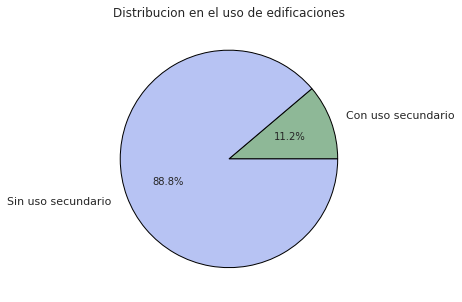

In [18]:
tiene_uso_secundario = len(tipos_de_uso_secundario)
sin_uso_secundario = len(earthquake_df.loc[earthquake_df["has_secondary_use"]==0])
plt.rcParams["figure.figsize"] = (20,5)
nombres= ['Con uso secundario', 'Sin uso secundario']
colors= [ '#8EB897', '#B7C3F3']
# Create a pieplot
plt.pie([tiene_uso_secundario, sin_uso_secundario], labels=nombres,  labeldistance=1.15,\
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black' }, colors=colors,autopct='%1.1f%%');
plt.title("Distribucion en el uso de edificaciones" )
plt.show();

In [19]:

cantidad_tipos_uso= tipos_de_uso_secundario.loc[:,"has_secondary_use_agriculture":"has_secondary_use_other"].sum()
cantidad_tipos_uso

has_secondary_use_agriculture    16704
has_secondary_use_hotel           8710
has_secondary_use_rental          2087
has_secondary_use_institution      244
has_secondary_use_school            94
has_secondary_use_industry         279
has_secondary_use_health_post       49
has_secondary_use_gov_office        38
has_secondary_use_use_police        23
has_secondary_use_other           1331
dtype: int64

In [20]:
usos_secundarios = pd.DataFrame({"usos":cantidad_tipos_uso.values},index=cantidad_tipos_uso.index)
usos_secundarios = usos_secundarios.loc[usos_secundarios["usos"]>100]

In [21]:
usos_secundarios.sort_values(by="usos", ascending=False)

,usos
has_secondary_use_agriculture,16704
has_secondary_use_hotel,8710
has_secondary_use_rental,2087
has_secondary_use_other,1331
has_secondary_use_industry,279
has_secondary_use_institution,244


In [22]:
usos_secundarios

,usos
has_secondary_use_agriculture,16704
has_secondary_use_hotel,8710
has_secondary_use_rental,2087
has_secondary_use_institution,244
has_secondary_use_industry,279
has_secondary_use_other,1331


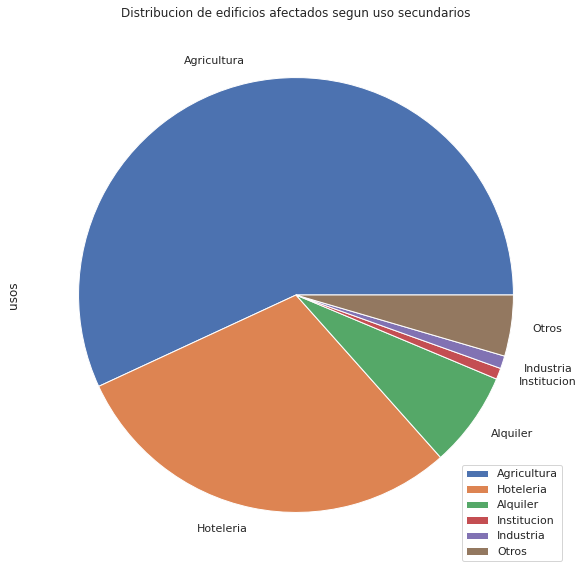

In [23]:
usos_secundarios.index=["Agricultura","Hoteleria","Alquiler","Institucion","Industria","Otros"]
plot = usos_secundarios.plot.pie(y='usos', figsize=(10, 10),title="Distribucion de edificios afectados segun uso secundarios")

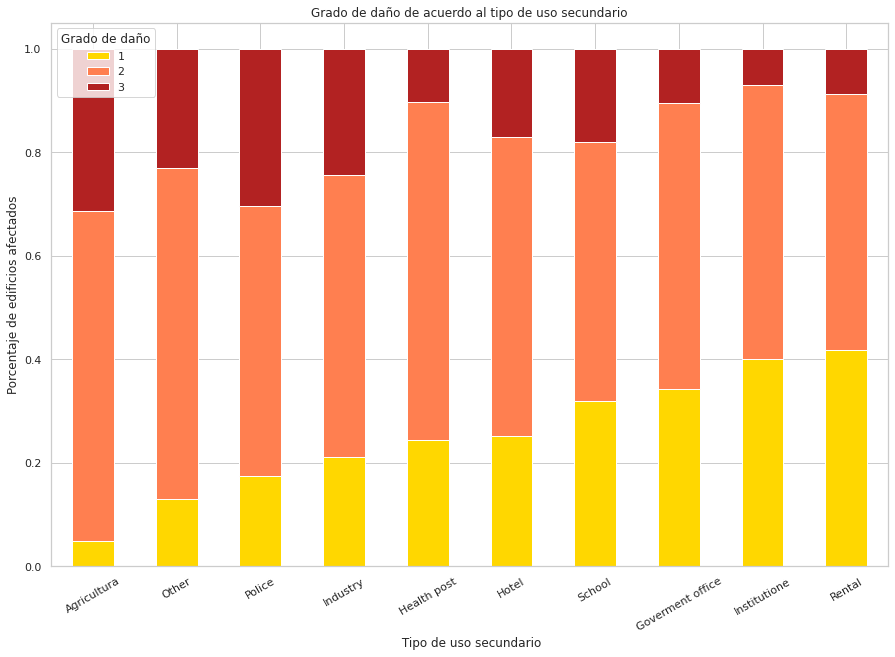

In [24]:
tipos_uso_daño = earthquake_df.loc[:,"has_secondary_use_agriculture":"has_secondary_use_other"]
tipos_uso_daño["building_id"] = earthquake_df["building_id"]
tipos_uso_daño = tipos_uso_daño.merge(earthquake_labels,how="inner")
tipos_uso_daño = tipos_uso_daño.groupby("damage_grade").agg({"has_secondary_use_agriculture":sum,"has_secondary_use_hotel":sum,"has_secondary_use_rental":sum,"has_secondary_use_institution":sum,"has_secondary_use_school":sum,"has_secondary_use_industry":sum,"has_secondary_use_health_post":sum,"has_secondary_use_gov_office":sum,"has_secondary_use_use_police":sum,"has_secondary_use_other":sum})
tipos_uso_daño = tipos_uso_daño.T
tipos_uso_daño["total"] = tipos_uso_daño.sum(axis=1)
tipos_uso_daño = tipos_uso_daño.T
for columna in tipos_uso_daño.columns:
  tipos_uso_daño[columna] = tipos_uso_daño[columna].divide(tipos_uso_daño[columna]["total"])
tipos_uso_daño  = tipos_uso_daño.T
del tipos_uso_daño["total"]
tipos_uso_daño.index = ["Agricultura","Hotel","Rental","Institutione","School","Industry","Health post","Goverment office","Police","Other"]
tipos_uso_daño.columns.name="Grado de daño"
tipos_uso_daño.sort_values(by=1,inplace=True)

tipos_uso_daño.plot(kind="bar",stacked=True,xlabel=" Tipo de uso secundario",ylabel="Porcentaje de edificios afectados",title="Grado de daño de acuerdo al tipo de uso secundario",rot=30,figsize=(15,10), color=colores)


**Daño de acuerdo al tipo de techo**

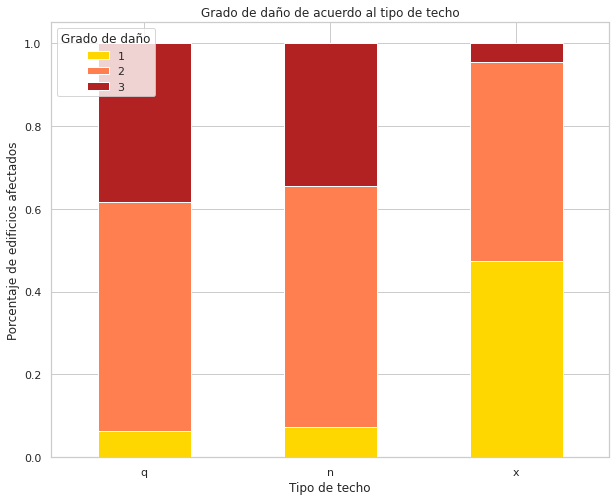

In [25]:
daño_por_techo = earthquake_df[["building_id","roof_type"]].merge(earthquake_labels,how="inner")
daño_por_techo = daño_por_techo.pivot_table(index="roof_type",columns="damage_grade",values="building_id",aggfunc="count")

daño_por_techo.fillna(0,inplace=True)
daño_por_techo["total"] = 0
daño_por_techo["total"] = daño_por_techo.sum(axis=1)
daño_por_techo = daño_por_techo.T
for columna in daño_por_techo.columns:
  daño_por_techo[columna] = daño_por_techo[columna].divide(daño_por_techo[columna]["total"])
daño_por_techo = daño_por_techo.T
del daño_por_techo["total"]
daño_por_techo.columns.name= "Grado de daño"
daño_por_techo=daño_por_techo.sort_values(by=1)
daño_por_techo.plot(kind="bar",xlabel="Tipo de techo",ylabel="Porcentaje de edificios afectados", title="Grado de daño de acuerdo al tipo de techo",rot=0,figsize=(10,8),stacked=True, color = colores)

**Grado de daño de acuerdo al tipo de construcción**

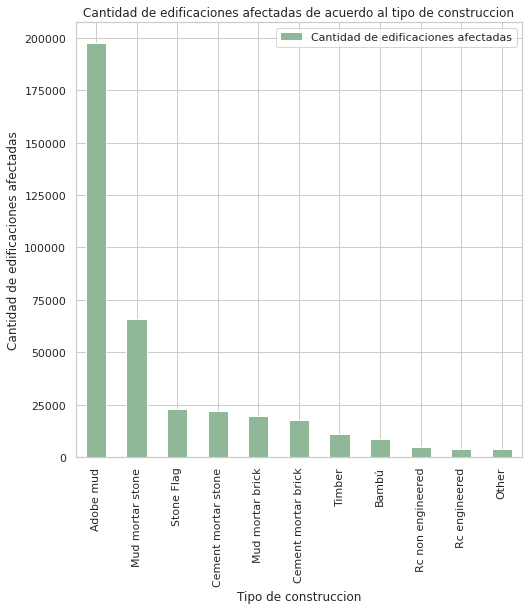

In [26]:
tipos_de_estructura = earthquake_df.loc[:,"has_superstructure_adobe_mud":"has_superstructure_other"].sum()
tipos_de_estructura = tipos_de_estructura.sort_values(ascending=False)
tipos_de_estructura.index = ["Adobe mud","Mud mortar stone","Stone Flag","Cement mortar stone","Mud mortar brick","Cement mortar brick","Timber","Bambú","Rc non engineered","Rc engineered","Other"]
tipos_de_estructura_plot = pd.DataFrame({'Cantidad de edificaciones afectadas':tipos_de_estructura},
                  index=tipos_de_estructura.index)
plot = tipos_de_estructura_plot.plot.bar(y='Cantidad de edificaciones afectadas', figsize=(8, 8),color="#8EB897",title="Cantidad de edificaciones afectadas de acuerdo al tipo de construccion",xlabel="Tipo de construccion",ylabel="Cantidad de edificaciones afectadas")

In [27]:
tipos_estructura_daño = earthquake_df.loc[:,"has_superstructure_adobe_mud":"has_superstructure_other"]
tipos_estructura_daño["building_id"] = earthquake_df["building_id"]
tipos_estructura_daño = tipos_estructura_daño.merge(earthquake_labels,how="inner")
tipos_estructura_daño = tipos_estructura_daño.groupby("damage_grade").agg({"has_superstructure_adobe_mud":sum,"has_superstructure_mud_mortar_stone":sum,"has_superstructure_stone_flag":sum,"has_superstructure_cement_mortar_stone":sum,"has_superstructure_mud_mortar_brick":sum,"has_superstructure_cement_mortar_brick":sum,"has_superstructure_timber":sum,"has_superstructure_bamboo":sum,"has_superstructure_rc_non_engineered":sum,"has_superstructure_rc_engineered":sum,"has_superstructure_other":sum})
tipos_estructura_daño = tipos_estructura_daño.T
tipos_estructura_daño["total"] = tipos_estructura_daño.sum(axis=1)
tipos_estructura_daño = tipos_estructura_daño.T
tipos_estructura_daño

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
damage_grade,,,,,,,,,,,
1,578,8659,174,827,622,7077,7557,2798,3846,2646,648
2,13767,113359,4486,3233,11590,11371,39874,13916,5799,1392,2236
3,8562,75506,4219,670,5417,1086,18538,5296,1409,75,999
total,22907,197524,8879,4730,17629,19534,65969,22010,11054,4113,3883


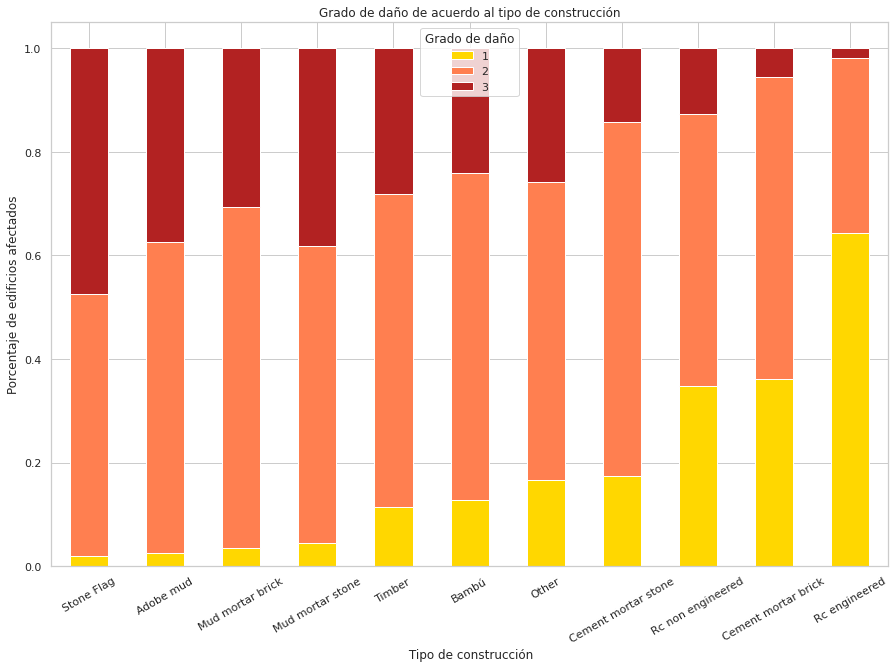

In [28]:
for columna in tipos_estructura_daño.columns:
  tipos_estructura_daño[columna] = tipos_estructura_daño[columna].divide(tipos_estructura_daño[columna]["total"])
tipos_estructura_daño  = tipos_estructura_daño.T
del tipos_estructura_daño["total"]

tipos_estructura_daño.index = ["Adobe mud","Mud mortar stone","Stone Flag","Cement mortar stone","Mud mortar brick","Cement mortar brick","Timber","Bambú","Rc non engineered","Rc engineered","Other"]
tipos_estructura_daño.columns.name="Grado de daño"
tipos_estructura_daño.sort_values(by=1,inplace=True)
tipos_estructura_daño.plot(kind="bar",stacked=True,xlabel=" Tipo de construcción",ylabel="Porcentaje de edificios afectados",title="Grado de daño de acuerdo al tipo de construcción",rot=30,figsize=(15,10), color=colores)

**Grado de daño de acuerdo a la cantidad de pisos**

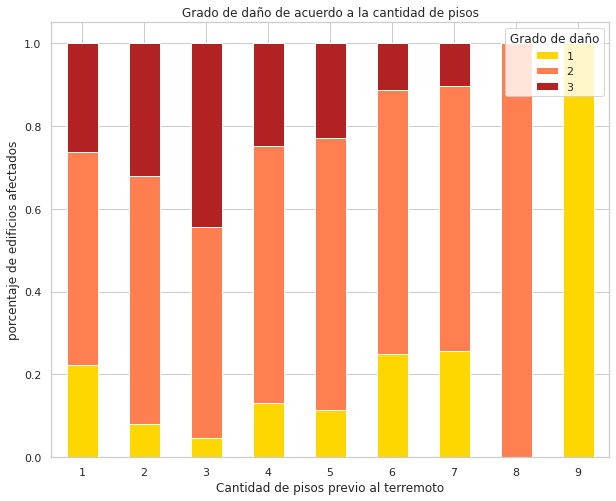

In [29]:
daño_por_piso = earthquake_df[["building_id","count_floors_pre_eq"]].merge(earthquake_labels,how="inner")
daño_por_piso = daño_por_piso.pivot_table(columns="damage_grade",index="count_floors_pre_eq",values="building_id",aggfunc="count")
daño_por_piso.fillna(0,inplace=True)
daño_por_piso["total"] = 0
daño_por_piso["total"] = daño_por_piso.sum(axis=1)
daño_por_piso = daño_por_piso.T
for columna in daño_por_piso.columns:
  daño_por_piso[columna] = daño_por_piso[columna].divide(daño_por_piso[columna]["total"])
daño_por_piso = daño_por_piso.T
del daño_por_piso["total"]
daño_por_piso.columns.name= "Grado de daño"

daño_por_piso.plot(kind="bar",xlabel="Cantidad de pisos previo al terremoto", ylabel="porcentaje de edificios afectados",title="Grado de daño de acuerdo a la cantidad de pisos",figsize=(10,8),stacked=True,color = colores,rot=0)

**Daño de acuerdo al tipo de cimiento**

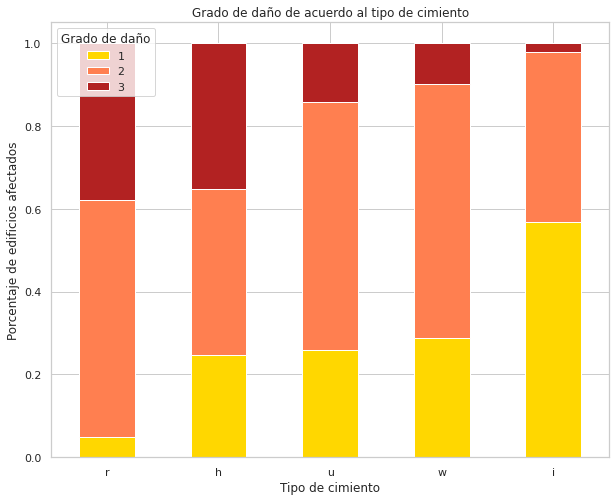

In [30]:
daño_por_cimientos = earthquake_df[["building_id","foundation_type"]].merge(earthquake_labels,how="inner")
daño_por_cimientos = daño_por_cimientos.pivot_table(columns="damage_grade",index="foundation_type",values="building_id",aggfunc="count")
daño_por_cimientos.fillna(0,inplace=True)
daño_por_cimientos["total"] = 0
daño_por_cimientos["total"] = daño_por_cimientos.sum(axis=1)
daño_por_cimientos = daño_por_cimientos.T
for columna in daño_por_cimientos.columns:
  daño_por_cimientos[columna] = daño_por_cimientos[columna].divide(daño_por_cimientos[columna]["total"])
daño_por_cimientos = daño_por_cimientos.T
del daño_por_cimientos["total"]
daño_por_cimientos.columns.name= "Grado de daño"
daño_por_cimientos = daño_por_cimientos.sort_values(by=1)
daño_por_cimientos.plot(kind="bar",xlabel="Tipo de cimiento",ylabel="Porcentaje de edificios afectados",title="Grado de daño de acuerdo al tipo de cimiento",rot=0,figsize=(10,8),stacked=True,color = colores)


**Rc engineered cimientos i**


In [31]:
rc_i = earthquake_df[(earthquake_df["has_superstructure_rc_engineered"]==1) & (earthquake_df["foundation_type"]=="i")]
len(rc_i)

3636

In [32]:
rc = earthquake_df[(earthquake_df["has_superstructure_rc_engineered"]==1)]
rc_sin_i = len(rc)-len(rc_i)
rc_sin_i

477

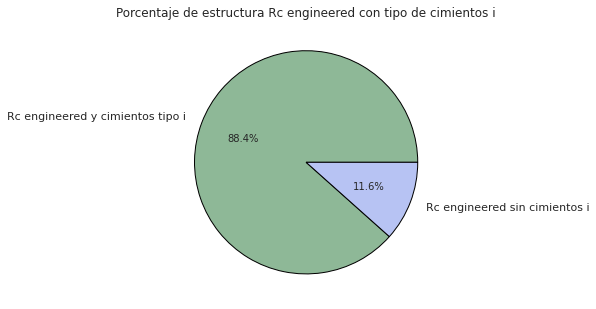

In [33]:
plt.rcParams["figure.figsize"] = (5,10)
nombres= ['Rc engineered y cimientos tipo i', 'Rc engineered sin cimientos i']
colors= colores
plt.pie([len(rc_i),rc_sin_i], labels=nombres,  labeldistance=1.15,\
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black' }, colors=['#8EB897', '#B7C3F3',], autopct='%1.1f%%');
plt.title("Porcentaje de estructura Rc engineered con tipo de cimientos i")
plt.show();

**Daño de acuerdo a la configuración del plano**

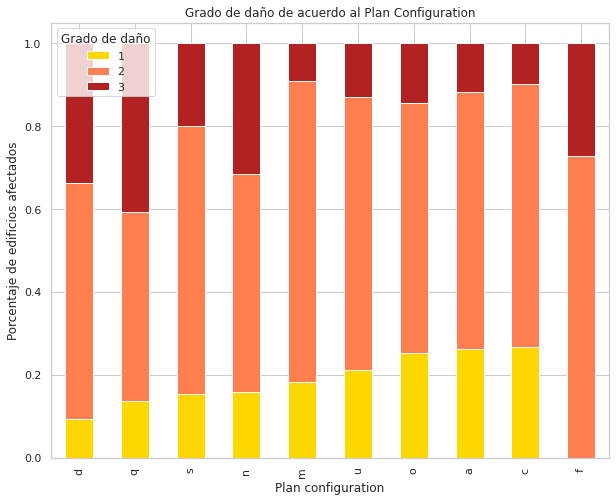

In [34]:
plan_configuration = earthquake_df.loc[:,["plan_configuration","building_id"]]
plan_configuration = plan_configuration.merge(earthquake_labels,how="inner")

plan_configuration = plan_configuration.pivot_table(index="plan_configuration",columns="damage_grade",values="building_id",aggfunc="count")
plan_configuration["total"] = plan_configuration.sum(axis=1)
plan_configuration = plan_configuration.T

for columna in plan_configuration.columns:
  plan_configuration[columna] = plan_configuration[columna].divide(plan_configuration[columna]["total"])
plan_configuration  = plan_configuration.T
del plan_configuration["total"]
plan_configuration.sort_values(by=1,inplace=True)
plan_configuration.columns.name = "Grado de daño"
plan_configuration.plot(kind="bar",stacked=True,figsize=(10,8), xlabel= "Plan configuration", ylabel="Porcentaje de edificios afectados", title="Grado de daño de acuerdo al Plan Configuration",color=colores)

### **Hipotesis**:





**Los edificios más viejos y mas altos sufrieron más daños**

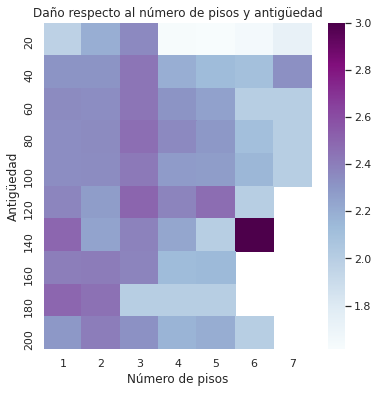

In [35]:
antiguedad_altura_short = earthquake_df.loc[(earthquake_df["count_floors_pre_eq"] < 8)]
l = [0,20,40,60,80,100,120,140,160,180,200]
labels = ['20','40','60','80','100','120','140','160','180','200']
antiguedad_altura_short["age"] = pd.cut(antiguedad_altura_short["age"], bins=l, include_lowest=True,labels=labels)
daño_por_antiguedad_altura = antiguedad_altura_short[["building_id","age","count_floors_pre_eq"]].merge(earthquake_labels,how="inner")\
                                          .pivot_table(index='age',columns='count_floors_pre_eq',values='damage_grade',aggfunc='mean')
heatmap_floors = sns.heatmap(daño_por_antiguedad_altura, cmap="BuPu")
heatmap_floors.set_xlabel('Número de pisos')
heatmap_floors.set_ylabel('Antigüedad')
heatmap_floors.set_title('Daño respecto al número de pisos y antigüedad')
heatmap_floors.figure.set_size_inches(6,6)

**Mientras mayor sea el cociente altura/área mayor será el daño**

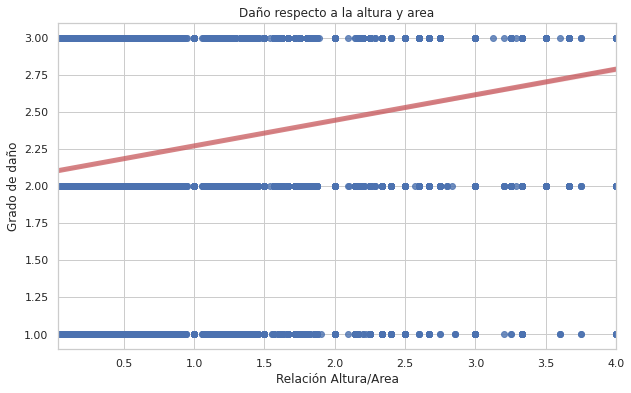

In [36]:

earthquake_df["altura_sobre_area"] = earthquake_df["height_percentage"]/earthquake_df["area_percentage"]
daño_por_altura_area_short = earthquake_df.loc[earthquake_df["altura_sobre_area"] <= 4]
daño_por_altura_area = daño_por_altura_area_short[["building_id","altura_sobre_area"]].merge(earthquake_labels,how="inner")
altura_area_graph = sns.regplot(x=daño_por_altura_area["altura_sobre_area"], y=daño_por_altura_area["damage_grade"], line_kws={"color":"r","alpha":0.7,"lw":5})
altura_area_graph.set_xlabel('Relación Altura/Area')
altura_area_graph.set_ylabel('Grado de daño')
altura_area_graph.set_title('Daño respecto a la altura y area')
altura_area_graph.figure.set_size_inches(10,6)
plt.show()

**Las estructuras de concreto son menos propensas a daños de grado 3** 

In [37]:
earthquake_cref = earthquake_df.loc[(earthquake_df['has_superstructure_rc_engineered'] == 1) \
                                    | (earthquake_df['has_superstructure_rc_non_engineered'] == 1),\
                                    ['building_id', 'age']]
earthquake_cref= earthquake_cref.merge(earthquake_labels, on='building_id')
earthquake_cref_by_damage = earthquake_cref.groupby('damage_grade').agg({'building_id':'count'})
earthquake_cref_by_damage = earthquake_cref_by_damage.rename(columns={'building_id':'total_building'})
earthquake_cref_by_damage = earthquake_cref_by_damage.reset_index()
earthquake_cref_by_damage

,damage_grade,total_building
0,1,6432
1,2,7160
2,3,1480


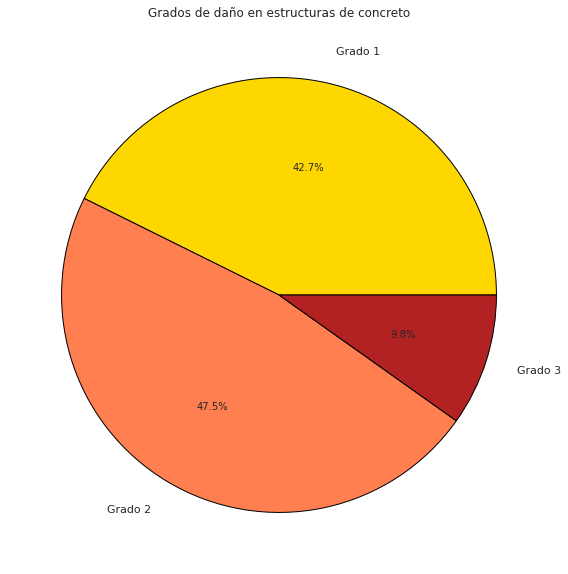

In [38]:
plt.rcParams["figure.figsize"] = (20,10)

nombres= ['Grado 1', 'Grado 2', 'Grado 3']
colors= colores


#plt.boxplot("PopularitY of Programming Language\n", bbox={'facecolor':'0.8', 'pad':5})
# Create a pieplot
plt.pie(earthquake_cref_by_damage['total_building'], labels=nombres,  labeldistance=1.15,\
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black' }, colors=colors, autopct='%1.1f%%');
plt.title("Grados de daño en estructuras de concreto")
plt.show();

Comparacion con estructuras que no son de concreto.

In [39]:
earthquake_non_cref = earthquake_df.loc[(earthquake_df['has_superstructure_rc_engineered'] == 0) \
                                    & (earthquake_df['has_superstructure_rc_non_engineered'] == 0),\
                                    ['building_id', 'age']]
earthquake_non_cref= earthquake_non_cref.merge(earthquake_labels, on='building_id')
earthquake__non_cref_by_damage = earthquake_non_cref.groupby('damage_grade').agg({'building_id':'count'})
earthquake__non_cref_by_damage = earthquake__non_cref_by_damage.rename(columns={'building_id':'total_building'})
earthquake__non_cref_by_damage = earthquake__non_cref_by_damage.reset_index()
earthquake__non_cref_by_damage

,damage_grade,total_building
0,1,18513
1,2,140277
2,3,85349


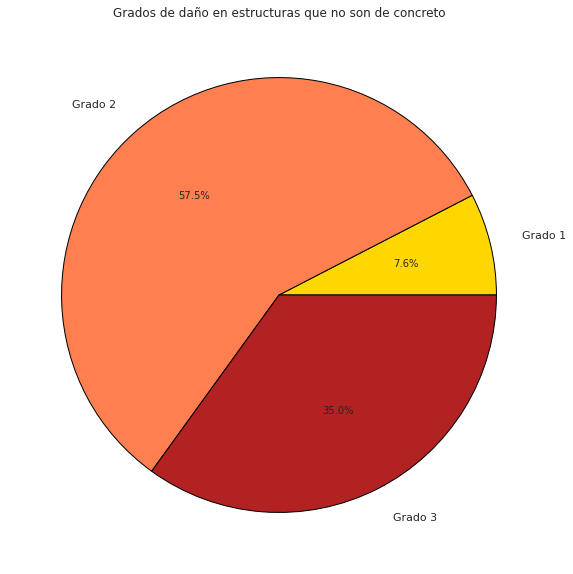

In [40]:
plt.rcParams["figure.figsize"] = (20,10)

nombres= ['Grado 1', 'Grado 2', 'Grado 3']
colors= colores


#plt.boxplot("PopularitY of Programming Language\n", bbox={'facecolor':'0.8', 'pad':5})
# Create a pieplot
plt.pie(earthquake__non_cref_by_damage['total_building'], labels=nombres,  labeldistance=1.15,\
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black' }, colors=colors, autopct='%1.1f%%');
plt.title("Grados de daño en estructuras que no son de concreto")
plt.show();

**Hay zonas especificas que reciben mas daño grave**

In [41]:
earthquake_cref2 = earthquake_df.loc[(earthquake_df['has_superstructure_rc_non_engineered'] == 1) | \
                                     (earthquake_df['has_superstructure_rc_engineered'] == 1) ,\
                                    ['building_id', 'geo_level_1_id']]
earthquake_cref2_zone = earthquake_cref2.merge(earthquake_labels, on='building_id')
earthquake_cref_by_zone = earthquake_cref2_zone.groupby(['damage_grade','geo_level_1_id']).agg({'building_id':'count'})

Filtro solo las zonas que tienen mas de 100 edificios.

In [42]:
earthquake_cref_by_graf1 = earthquake_cref_by_zone
earthquake_cref_by_graf1['Total'] = earthquake_cref_by_graf1.groupby('geo_level_1_id')['building_id'].transform('sum')
earthquake_cref_by_graf1['mean'] = (earthquake_cref_by_graf1['building_id'] / earthquake_cref_by_graf1['Total'])
earthquake_cref_by_graf1 = earthquake_cref_by_graf1.reset_index()
earthquake_cref_by_graf1 = earthquake_cref_by_graf1.loc[earthquake_cref_by_graf1['Total'] > 100 ,['geo_level_1_id','damage_grade', 'mean']]
earthquake_cref_by_graf1

,geo_level_1_id,damage_grade,mean
0,0,1,0.21
1,1,1,0.47
3,3,1,0.33
4,4,1,0.12
5,5,1,0.35
...,...,...,...
78,22,3,0.11
80,25,3,0.14
81,26,3,0.01
82,27,3,0.22


In [43]:
earthquake_cref_by_graf2 = earthquake_cref_by_graf1.set_index(['geo_level_1_id', 'damage_grade'])
earthquake_cref_by_graf2 = earthquake_cref_by_graf2.unstack().fillna(0)
earthquake_cref_by_graf2.columns = [1,2,3]
earthquake_cref_by_graf2.columns.name = "Grado de daño"
earthquake_cref_by_graf2

Grado de daño,1,2,3
geo_level_1_id,,,
0,0.21,0.77,0.02
1,0.47,0.42,0.10
3,0.33,0.48,0.18
4,0.12,0.66,0.22
5,0.35,0.62,0.03
6,0.73,0.27,0.00
7,0.49,0.50,0.01
8,0.43,0.42,0.14
9,0.36,0.62,0.02


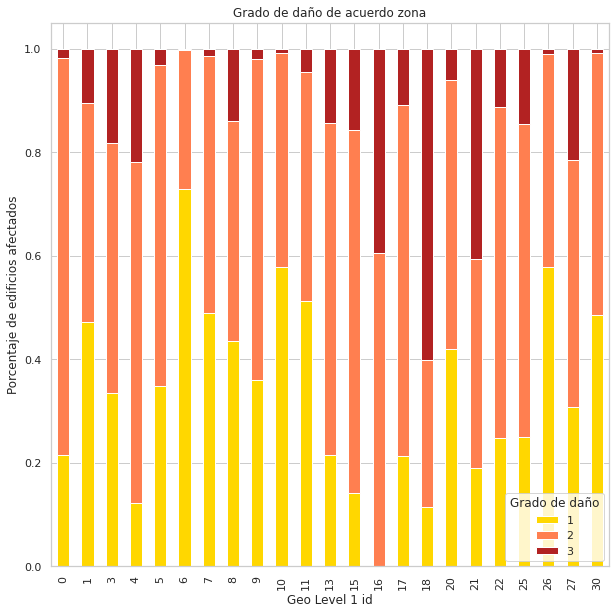

In [44]:
earthquake_cref_by_graf2.plot(kind="bar",stacked=True,figsize=(10,10), xlabel= "Geo Level 1 id", ylabel="Porcentaje de edificios afectados", title="Grado de daño de acuerdo zona",color=colores)

**Las estructuras de barro son mas propensas al daño**

In [45]:
earthquake_adobe = earthquake_df.loc[(earthquake_df['has_superstructure_adobe_mud'] == 1) \
                                    | (earthquake_df['has_superstructure_mud_mortar_brick'] == 1)\
                                    | (earthquake_df['has_superstructure_mud_mortar_stone'] == 1),\
                                      
                                    ['building_id', 'age']]
earthquake_adobe= earthquake_adobe.merge(earthquake_labels, on='building_id')
earthquake_adobe_by_damage = earthquake_adobe.groupby('damage_grade').agg({'building_id':'count'})
earthquake_adobe_by_damage = earthquake_adobe_by_damage.reset_index()
earthquake_adobe_by_damage

,damage_grade,building_id
0,1,9511
1,2,128204
2,3,83416


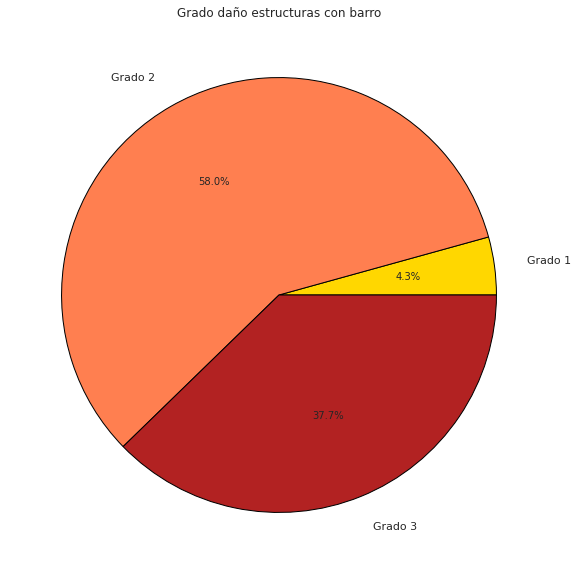

In [46]:
plt.rcParams["figure.figsize"] = (20,10)
nombres = ['Grado 1', 'Grado 2', 'Grado 3']

#colors= [ '#8EB897', '#B7C3F3', '#DD7596']
colors = colores
# Create a pieplot
plt.pie(earthquake_adobe_by_damage['building_id'], labels=nombres,  labeldistance=1.15,\
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black' }, colors=colors,  autopct='%1.1f%%');
plt.title("Grado daño estructuras con barro")
plt.show();

In [47]:
earthquake_non_adobe = earthquake_df.loc[(earthquake_df['has_superstructure_adobe_mud'] == 0) \
                                    & (earthquake_df['has_superstructure_mud_mortar_brick'] == 0)\
                                    & (earthquake_df['has_superstructure_mud_mortar_stone'] == 0),\
                                      
                                    ['building_id', 'age']]
earthquake_non_adobe= earthquake_non_adobe.merge(earthquake_labels, on='building_id')
earthquake_non_adobe_by_damage = earthquake_non_adobe.groupby('damage_grade').agg({'building_id':'count'})
earthquake_non_adobe_by_damage = earthquake_non_adobe_by_damage.reset_index()
earthquake_non_adobe_by_damage

,damage_grade,building_id
0,1,15434
1,2,19233
2,3,3413


Edificaciones sin barro

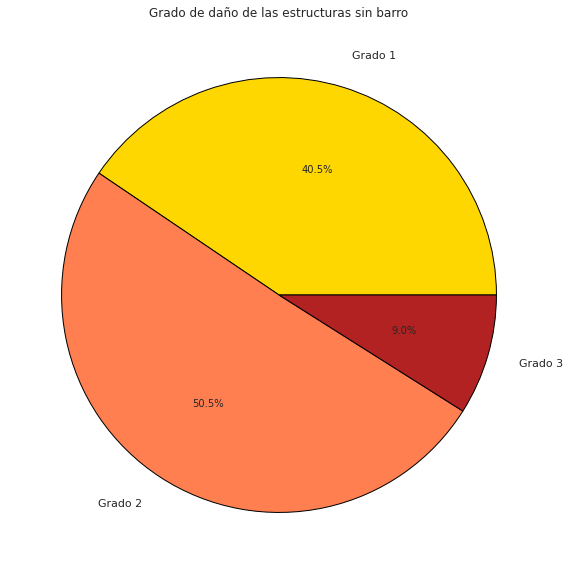

In [48]:
plt.rcParams["figure.figsize"] = (20,10)
nombres = ['Grado 1', 'Grado 2', 'Grado 3']
colors= colores
# Create a pieplot
plt.pie(earthquake_non_adobe_by_damage['building_id'], labels=nombres,  labeldistance=1.15,\
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black' }, colors=colors,  autopct='%1.1f%%');
plt.title("Grado de daño de las estructuras sin barro")
plt.show();

**Las edificaciones de Bamboo de mas de 2 pisos son mas inestables y reciben mucho daño**

In [49]:
earthquake_bamboo = earthquake_df.loc[(earthquake_df['has_superstructure_bamboo'] == 1) ,\
                                      ['building_id', 'age', 'count_floors_pre_eq']]
earthquake_bamboo= earthquake_bamboo.merge(earthquake_labels, on='building_id')
earthquake_bamboo_by_damage = earthquake_bamboo.groupby('damage_grade').agg({'building_id':'count'})
earthquake_bamboo_by_damage = earthquake_bamboo_by_damage.reset_index()
earthquake_bamboo_by_damage
 

,damage_grade,building_id
0,1,2798
1,2,13916
2,3,5296


In [50]:
earthquake_bamboo_may2 = earthquake_bamboo.loc[earthquake_bamboo['count_floors_pre_eq'] > 2 ,:]
earthquake_bamboo_may2 = earthquake_bamboo_may2.groupby('damage_grade').agg({'building_id':'count'})
earthquake_bamboo_may2 = earthquake_bamboo_may2.reset_index()
earthquake_bamboo_may2


,damage_grade,building_id
0,1,41
1,2,1430
2,3,1455


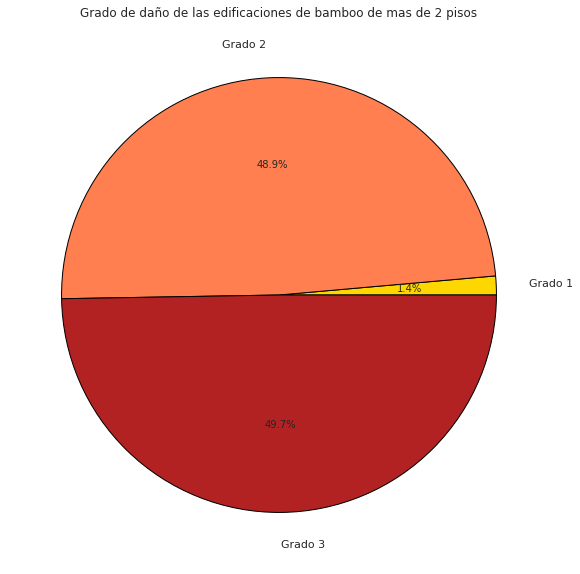

In [51]:
plt.rcParams["figure.figsize"] = (20,10)
nombres= ['Grado 1', 'Grado 2', 'Grado 3']
colors= colores
# Create a pieplot
plt.pie(earthquake_bamboo_may2['building_id'], labels=nombres,  labeldistance=1.15,\
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black' }, colors=colors,  autopct='%1.1f%%');
plt.title("Grado de daño de las edificaciones de bamboo de mas de 2 pisos")
plt.show();


**El terremoto afecta mas a las edificaciones antiguas**




Filtro por antiguedad y cantidad de pisos.

In [52]:
age_floors = earthquake_df[["building_id","age","count_floors_pre_eq"]].merge(earthquake_labels,how="right", on='building_id')
age_floors['unit'] = 1

Quiero saber cuantas edificaciones tienen mas de 100 años

In [53]:
age_floors['more 100 years'] = (age_floors['age'] > 100)
age_floors['more 100 years'].value_counts()

False    259867
True        734
Name: more 100 years, dtype: int64

Como son pocos en relacion a el total de las edificaciones los voy a agrupar en una sola categoria.

In [54]:
age_floors_more_100_years = age_floors.loc[age_floors['more 100 years'],:]
age_floors_more_100_years_by_damage = age_floors_more_100_years.groupby(['damage_grade']).agg({'unit':'sum'})
age_floors_more_100_years_by_damage = age_floors_more_100_years_by_damage.rename(columns= {'unit':'total_building'})
age_floors_more_100_years_by_damage['age'] = 'Mayoress de 100 años'
age_floors_more_100_years_by_damage = age_floors_more_100_years_by_damage[['age', 'total_building']]
age_floors_more_100_years_by_damage = age_floors_more_100_years_by_damage.reset_index()
age_floors_more_100_years_by_damage = age_floors_more_100_years_by_damage.set_index(['damage_grade','age'])
age_floors_more_100_years_by_damage

,,total_building
damage_grade,age,
1,Mayoress de 100 años,10
2,Mayoress de 100 años,455
3,Mayoress de 100 años,269


Recategorizo

In [55]:
age_floors_less_100_years = age_floors.loc[(age_floors['more 100 years']) == False ,:]
age_floors_less_100_years['age'] = age_floors_less_100_years['age'].replace(0,5).replace(5,10)
age_floors_less_100_years['age'] = age_floors_less_100_years['age'].replace(10,15)
age_floors_less_100_years['age'] = age_floors_less_100_years['age'].replace(15,20)
age_floors_less_100_years['age'] = age_floors_less_100_years['age'].replace(20,25)
age_floors_less_100_years['age'] = age_floors_less_100_years['age'].replace(25,'Hasta 25 años')
age_floors_less_100_years['age'] = age_floors_less_100_years['age'].replace(30,35)
age_floors_less_100_years['age'] = age_floors_less_100_years['age'].replace(35,40)
age_floors_less_100_years['age'] = age_floors_less_100_years['age'].replace(40,45)
age_floors_less_100_years['age'] = age_floors_less_100_years['age'].replace(45,50)
age_floors_less_100_years['age'] = age_floors_less_100_years['age'].replace(50,"Mas de 25 y menos de 50 años")
age_floors_less_100_years['age'] = age_floors_less_100_years['age'].replace(55,60)
age_floors_less_100_years['age'] = age_floors_less_100_years['age'].replace(60,65)
age_floors_less_100_years['age'] = age_floors_less_100_years['age'].replace(65,70)
age_floors_less_100_years['age'] = age_floors_less_100_years['age'].replace(70,75)
age_floors_less_100_years['age'] = age_floors_less_100_years['age'].replace(75,"Mas de 50 y menos de 75 años")
age_floors_less_100_years['age'] = age_floors_less_100_years['age'].replace(80,85)
age_floors_less_100_years['age'] = age_floors_less_100_years['age'].replace(85,90)
age_floors_less_100_years['age'] = age_floors_less_100_years['age'].replace(90,95)
age_floors_less_100_years['age'] = age_floors_less_100_years['age'].replace(95,100)
age_floors_less_100_years['age'] = age_floors_less_100_years['age'].replace(100,"Mas de 75 y hasta de 100 años")
age_floors_less_100_years_by_damage = age_floors_less_100_years.groupby(['damage_grade', 'age']).agg({'unit':'sum'})
age_floors_less_100_years_by_damage = age_floors_less_100_years_by_damage.rename( columns= {'unit':'total_building'})
age_floors_less_100_years_by_damage

total_building
damage_grade age                                          
1            Hasta 25 años                           23126
             Mas de 25 y menos de 50 años             1565
             Mas de 50 y menos de 75 años              177
             Mas de 75 y hasta de 100 años              67
2            Hasta 25 años                          107564
             Mas de 25 y menos de 50 años            29736
             Mas de 50 y menos de 75 años             5532
             Mas de 75 y hasta de 100 años            4150
3            Hasta 25 años                           60502
             Mas de 25 y menos de 50 años            19964
             Mas de 50 y menos de 75 años             3546
             Mas de 75 y hasta de 100 años            2548

Uno los dos dataFrame y agrego columnas para sacar el porcentaje del tipo de daño en relacion a la edad de los edificios.

In [56]:
age_floors_final = [age_floors_less_100_years_by_damage , age_floors_more_100_years_by_damage]
age_floors_final = pd.concat(age_floors_final)
age_floors_final = age_floors_final.groupby(['damage_grade', 'age']).agg({'total_building':'sum'})
age_floors_final['total_by_age'] = age_floors_final.groupby('age')['total_building'].transform('sum')
age_floors_final['mean_damage_grade'] = (age_floors_final['total_building']  * 100 / age_floors_final['total_by_age'] )
age_floors_final

total_building  ...    mean_damage_grade
damage_grade age                                            ...                     
1            Hasta 25 años                           23126  ...                12.10
             Mas de 25 y menos de 50 años             1565  ...                 3.05
             Mas de 50 y menos de 75 años              177  ...                 1.91
             Mas de 75 y hasta de 100 años              67  ...                 0.99
             Mayoress de 100 años                       10  ...                 1.36
2            Hasta 25 años                          107564  ...                56.26
             Mas de 25 y menos de 50 años            29736  ...                58.00
             Mas de 50 y menos de 75 años             5532  ...                59.77
             Mas de 75 y hasta de 100 años            4150  ...                61.35
             Mayoress de 100 años                      455  ...                61.99
3            Hasta 25 años                           60502  ...                31.64
             Mas de 25 y menos de 50 años            19964  ...                38.94
             Mas de 50 y menos de 75 años             3546  ...                38.31
             Mas de 75 y hasta de 100 años            2548  ...                37.66
             Mayoress de 100 años                      269  ...                36.65

[15 rows x 3 columns]

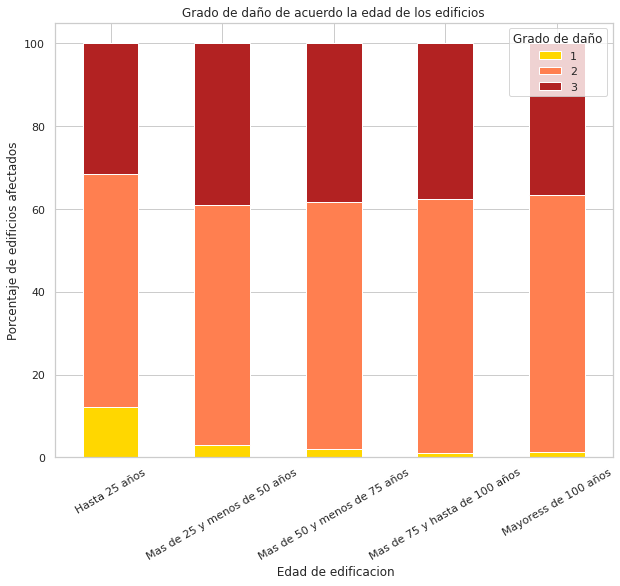

In [57]:
grafico_age_danio = age_floors_final.reset_index()
grafico_age_danio = grafico_age_danio.loc[:,['age', 'damage_grade', 'mean_damage_grade']]
grafico_age_danio = grafico_age_danio.set_index(['age', 'damage_grade'])
grafico_age_danio = grafico_age_danio.unstack()
grafico_age_danio.columns = [1,2,3]
grafico_age_danio.columns.name = "Grado de daño"
colors2= [ '#8EB897', '#B7C3F3', '#DD7596']
grafico_age_danio.plot(kind="bar",stacked=True, xlabel=" Edad de edificacion", ylabel="Porcentaje de edificios afectados",title="Grado de daño de acuerdo la edad de los edificios",rot=30,figsize=(10,8), color=colores)